# Departamento de Marketing

###  -Origem dos dados: https://www.kaggle.com/arjunbhasin2013/ccdata

## Importando das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [3]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Aqui podemos observar que existem alguns valores nulos em alguns atributos.

In [5]:
creditcard_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# Visualização e exploração dos dados

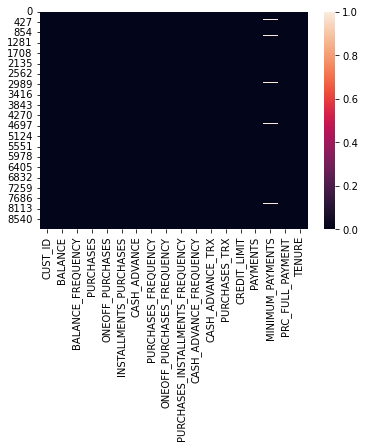

In [6]:
sns.heatmap(creditcard_df.isnull())
pass

In [7]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Com esta análise podemos ver com mais detalhes quais os atributos possuem dados faltantes, para então preenchê-los de alguma forma.

In [8]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [9]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [10]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [11]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [12]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
creditcard_df.duplicated().sum()

0

### Os valores faltantes foram preenchidos com a média dos valores. Além disso verificamos também que não há valores duplicados, que também poderia influenciar no resultado obtido ao final.

In [14]:
creditcard_df.drop('CUST_ID', axis=1, inplace = True) 
#Aqui eliminamos a coluna que possuem dados irrelevantes para o objetivo do problema.

In [15]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [17]:
len(creditcard_df.columns)

17

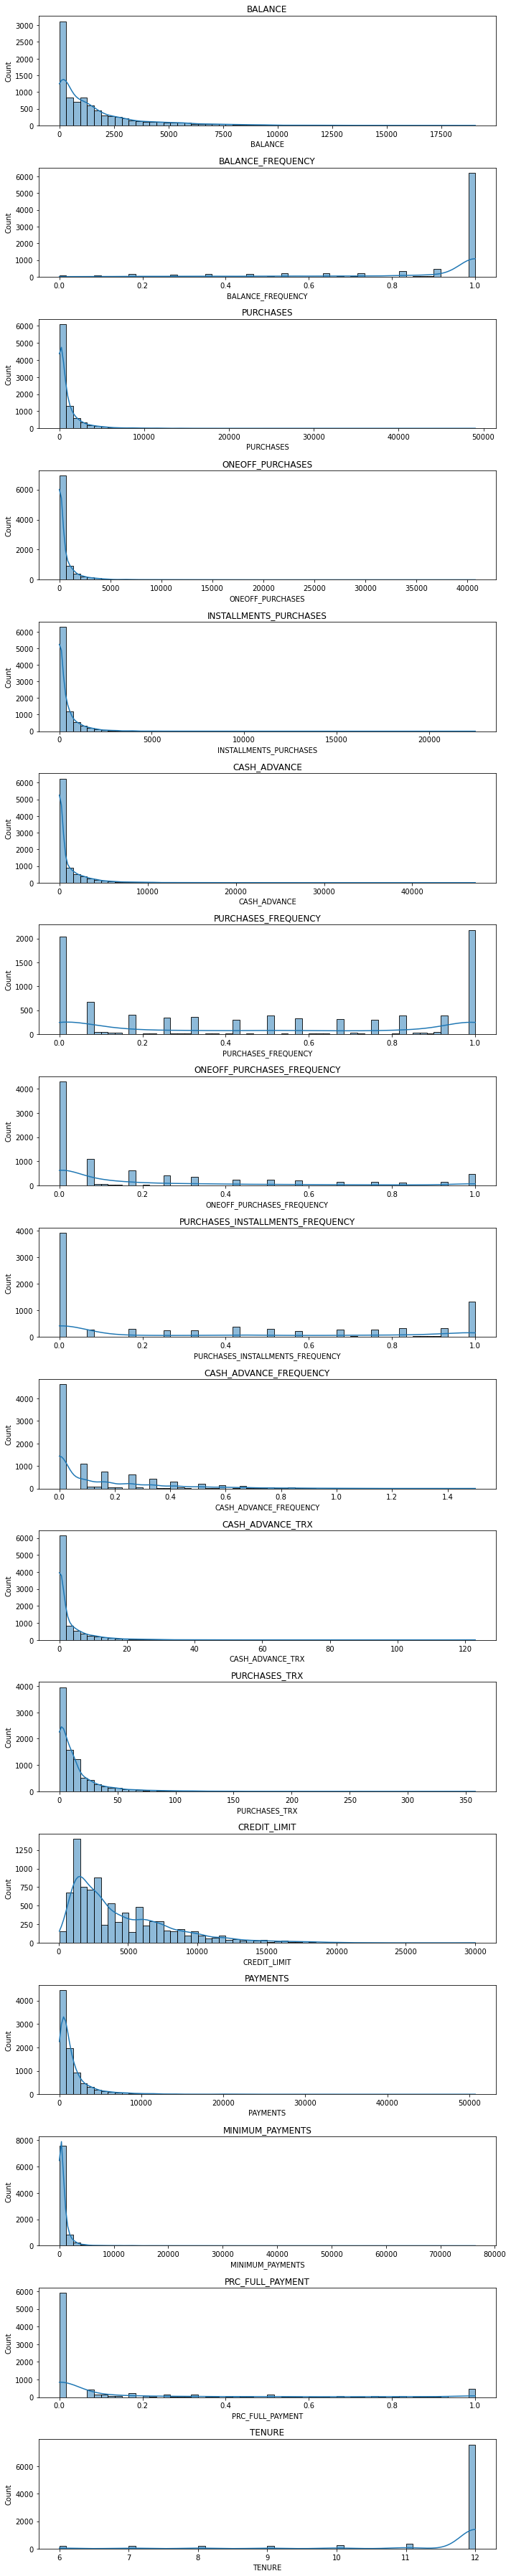

In [18]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.histplot(data = creditcard_df, x = creditcard_df.columns[i], kde=True, bins = 60)
    plt.title(creditcard_df.columns[i])
    
plt.tight_layout()
pass

### Acima podemos ter uma ideia geral a respeito da distribuição de valores de cada atributo.

In [19]:
correlation = creditcard_df.corr()

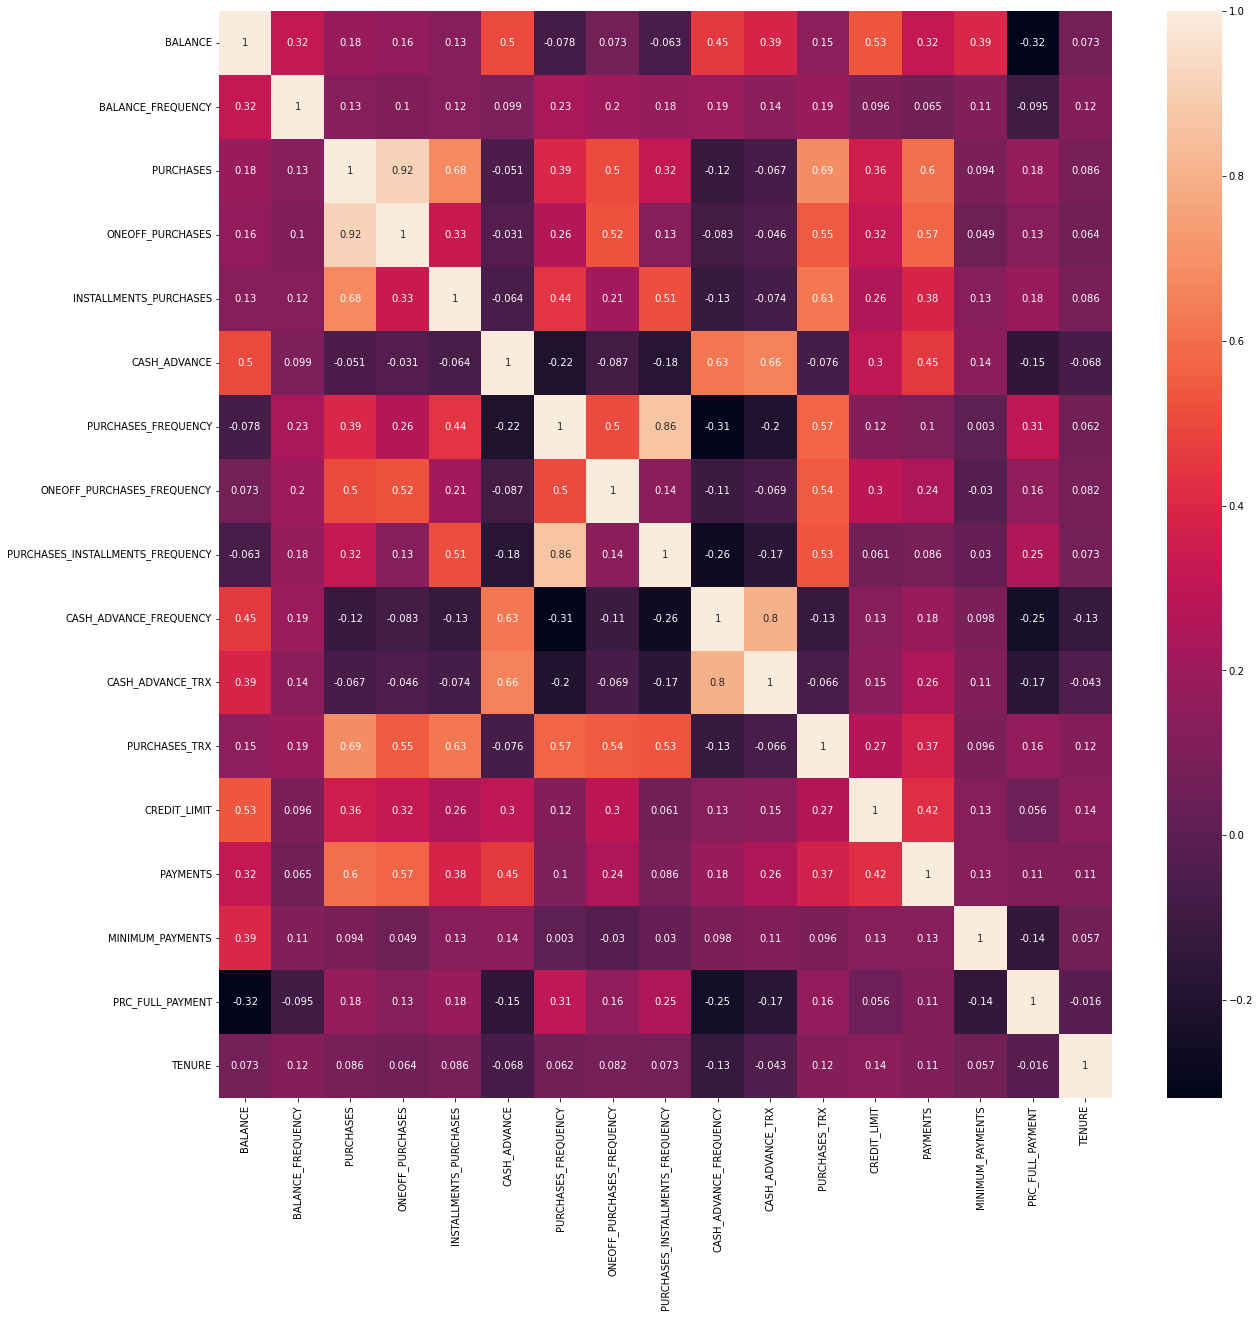

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot = True)
pass

### Podemos observar fortes correlações entre alguns atributos, como **PURCHASES** e **ONEOFF_PURCHASES**, por exemplo.

# Definindo o número de clusters usando o Elbow Method

### Como iremos utilizar o método de agrupamento k-means, é importante definirmos o número ideal de grupos que iremos utilizar, para isto utilizaremos o método Elbow. Mas antes, precisamos transformar todos os dados para uma mesma escala, a fim de evitar resultados enviesados ao utilizar o k-means.

In [21]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [22]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [23]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [24]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [25]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

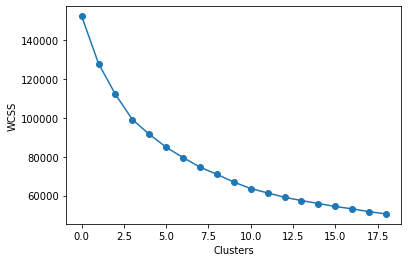

In [26]:
plt.plot(wcss_1, marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

### Através da análise do WCSS, podemos observar que o número de clusters igual a 8 é adequado para utilizar no k-means.

# Agrupamento com K-means 

In [27]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [28]:
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 622, 1180,  863,  420, 2719, 1103,   30, 2013], dtype=int64))

In [29]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)

In [30]:
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
1,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,266.075424,0.236063,11.783898
2,5083.068323,0.970031,536.838447,332.605956,204.350301,5234.339850,0.298252,0.138886,0.199290,0.520537,16.490151,8.069525,8246.239334,4123.330014,2059.024786,0.039473,11.609502
3,3479.242725,0.988054,5819.959145,3449.137221,2372.247102,573.415653,0.956142,0.666292,0.859765,0.073217,1.817102,83.857482,8952.375297,5449.952679,2183.670969,0.238046,11.964371
4,1603.024005,0.972928,229.594757,181.992020,47.784812,789.642020,0.142332,0.080076,0.062960,0.157615,3.095291,2.603753,3380.506500,1010.896669,855.588896,0.020044,11.882634
5,1225.772313,0.970147,1994.245839,1598.975721,395.270118,279.512186,0.868630,0.762495,0.399805,0.053480,1.042611,27.849501,5889.643946,2004.660395,486.267564,0.272939,11.866727
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,801.136827,0.956236,920.865753,186.944441,734.365067,216.346127,0.887787,0.086990,0.843532,0.040063,0.783905,19.352211,3543.676206,1102.229857,757.053521,0.245835,11.861898


## Dividindo os dados em 7 grupos, podemos observar a localização do centro de cada grupo definido pelo k-menas, com isto podemos imaginar maneiras de tratar alguns deles, como por exemplo:

### - Grupo 0 (clientes novos): clientes mais novos (menor tempo de uso do cartão, 7.22 anos) e que mantém pouco dinheiro na conta corrente (865 unidades);

### - Grupo 1: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (303). 23% de pagamento da fatura completa do cartão de crédito;

### - Grupo 2: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5083) e sacam muito dinheiro do cartão de crédito (5234), compram pouco (0.29) e usam bastante o limite do cartão para saques (0.52). Pagam muito pouco a fatura completa (0.03);

### - Grupo 6 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras seriam boas formas de se lidar com este grupo.


In [31]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


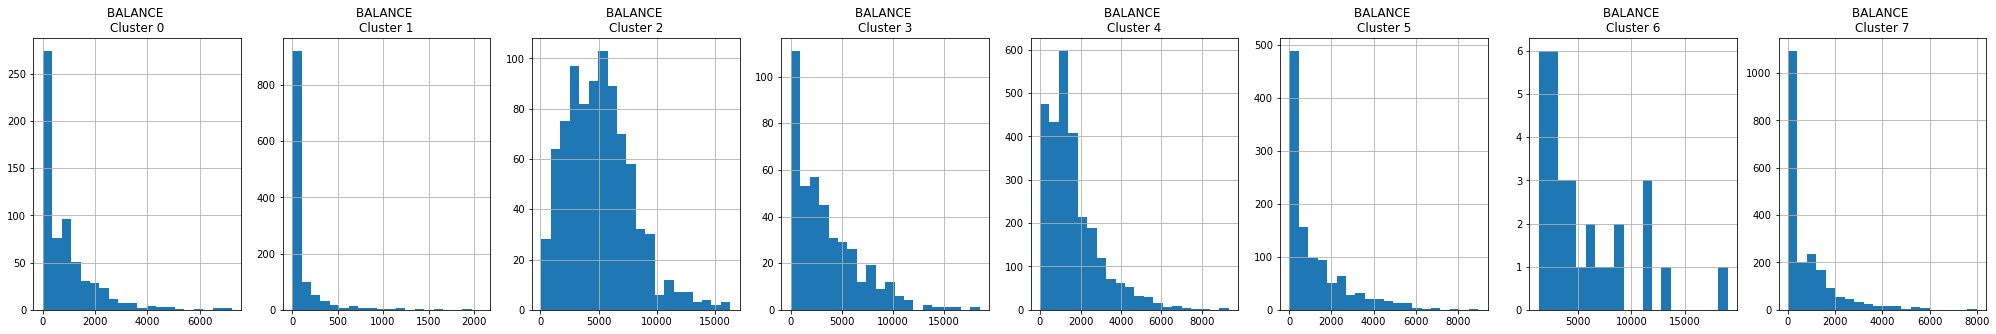

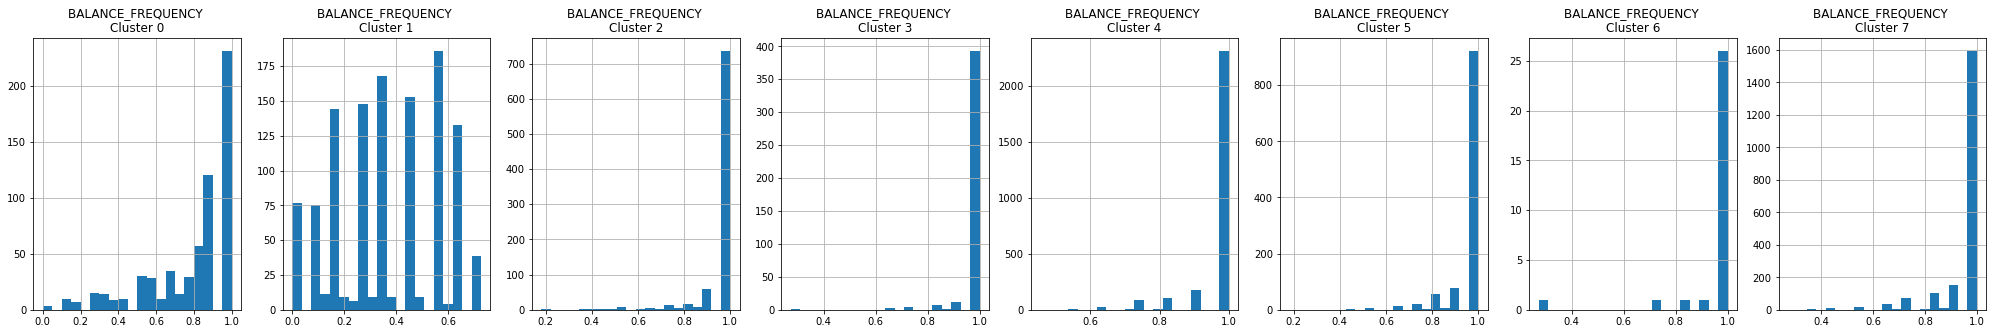

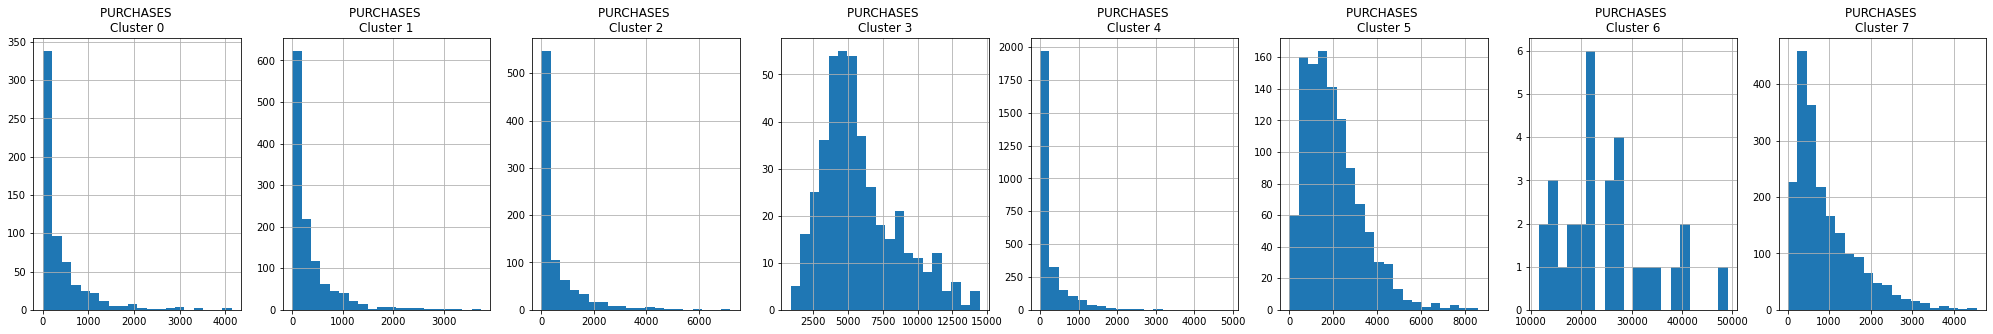

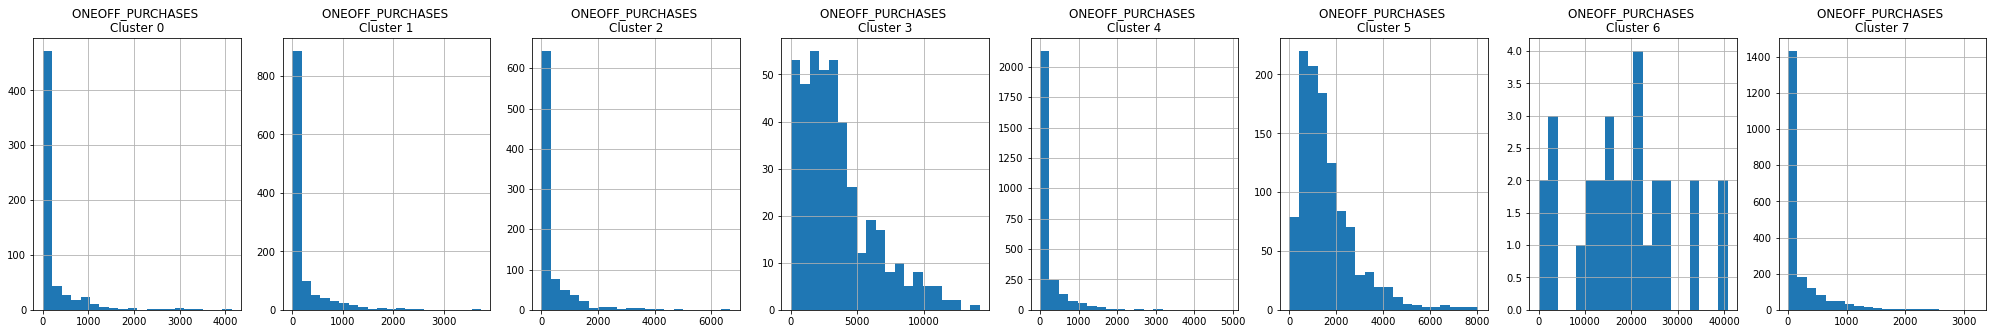

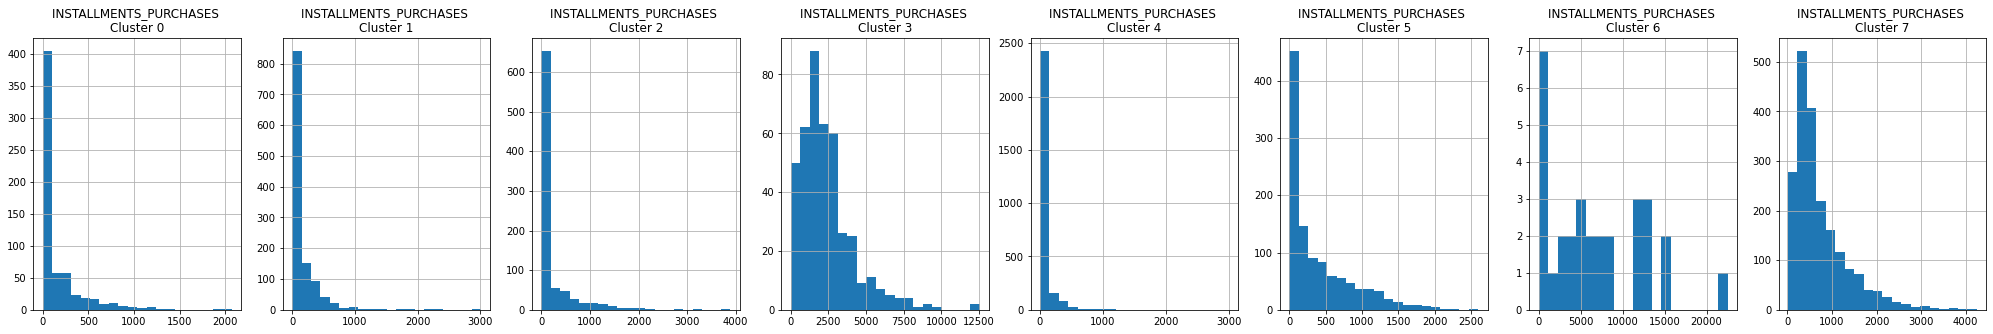

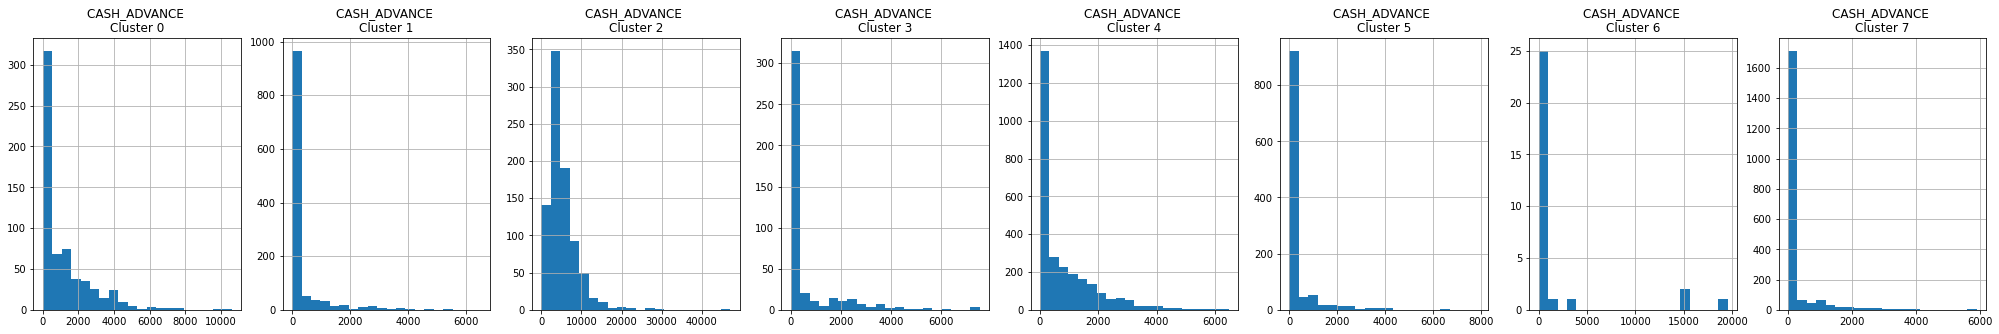

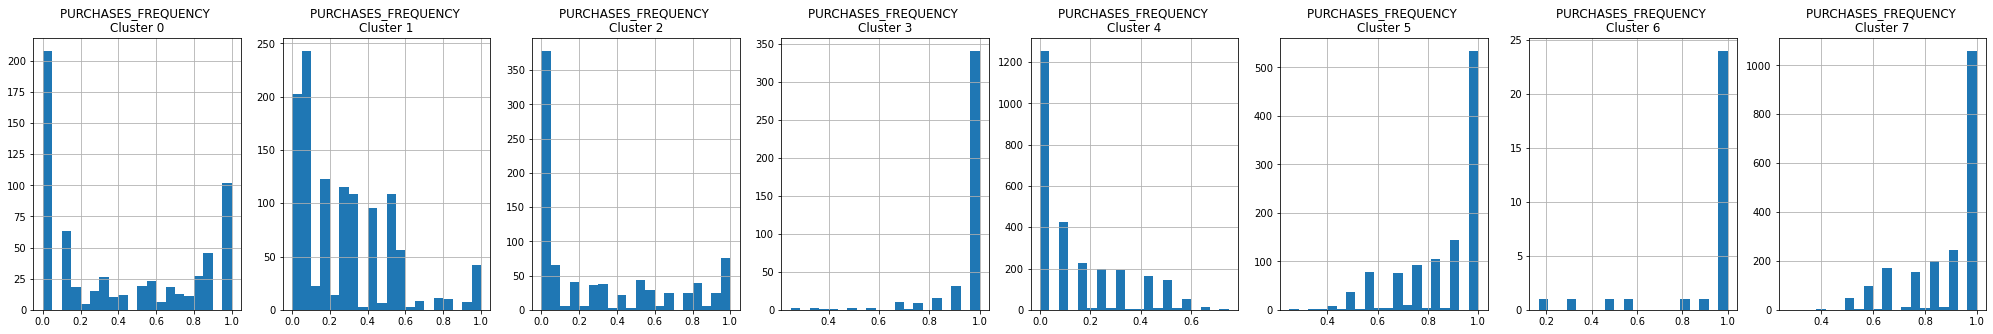

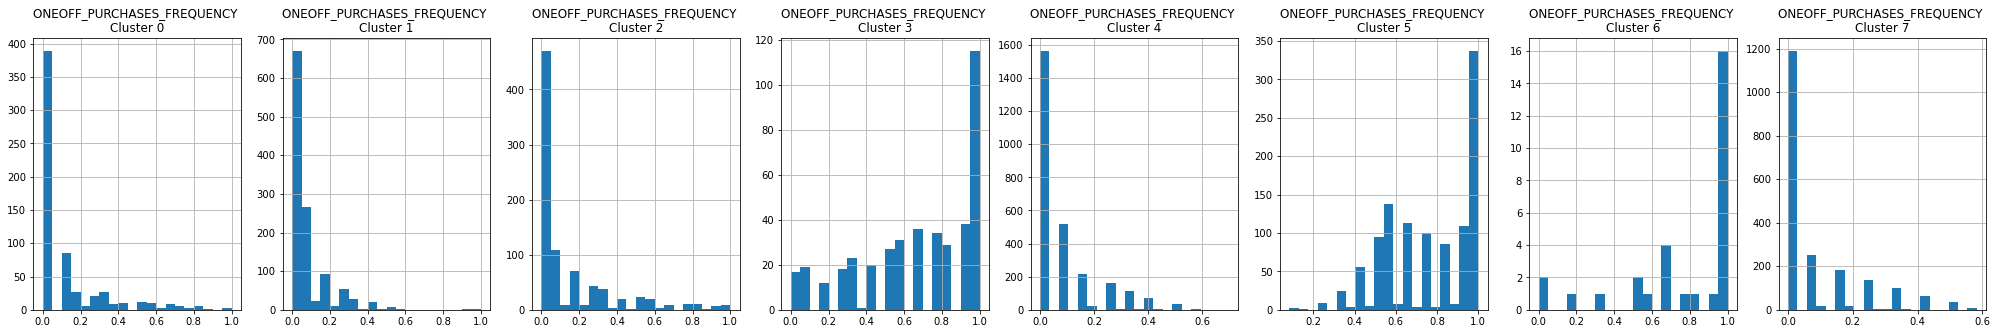

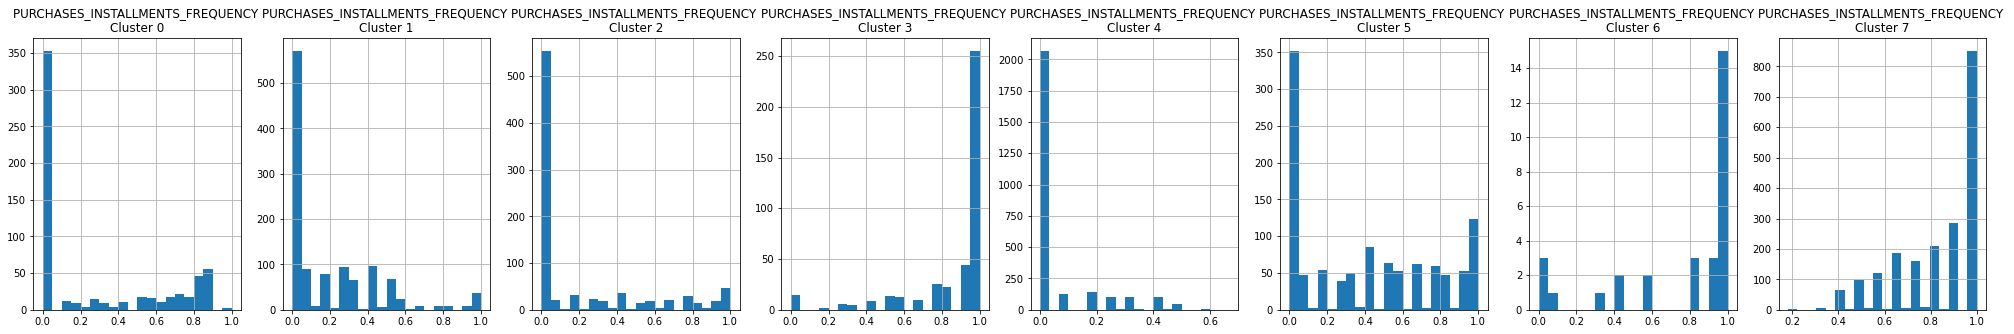

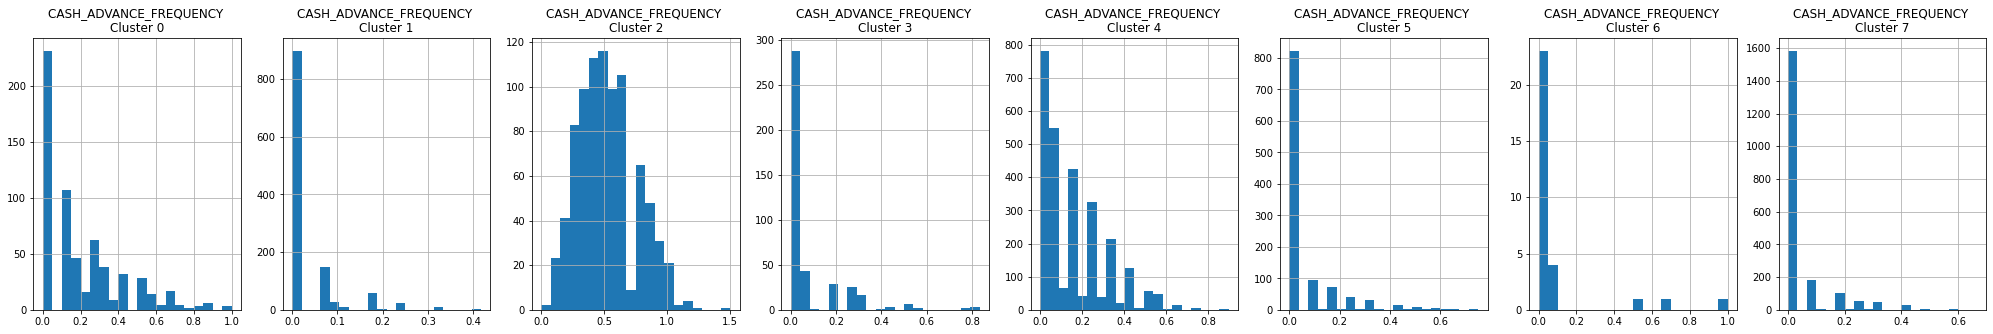

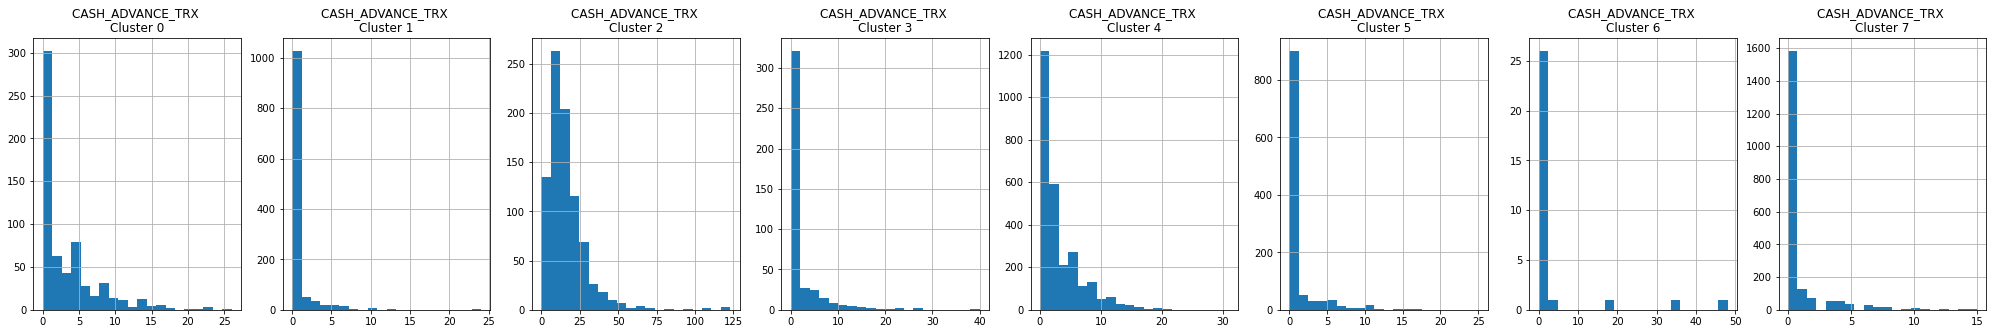

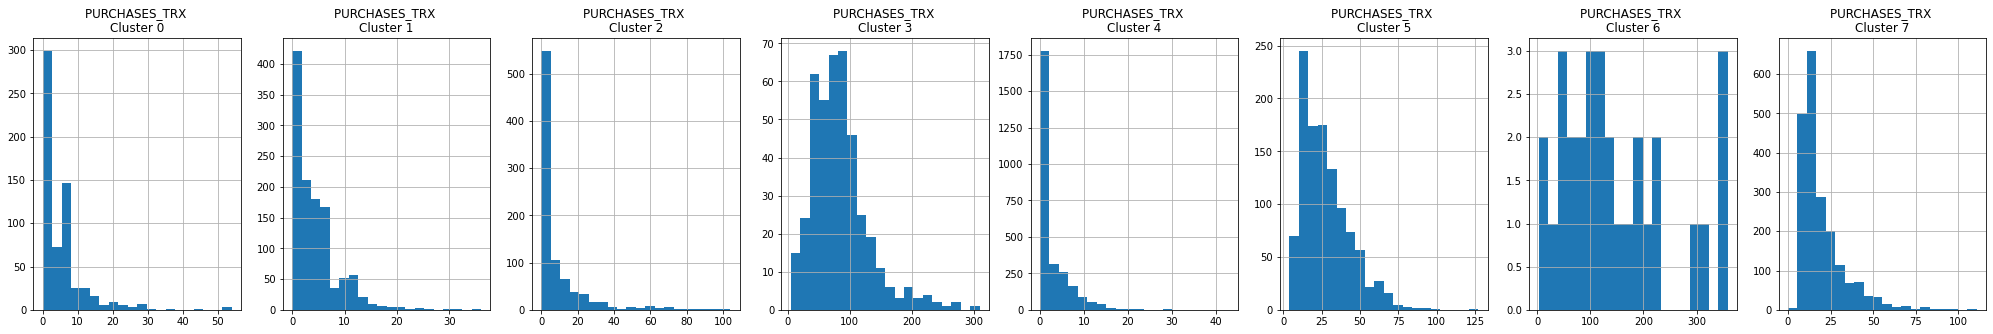

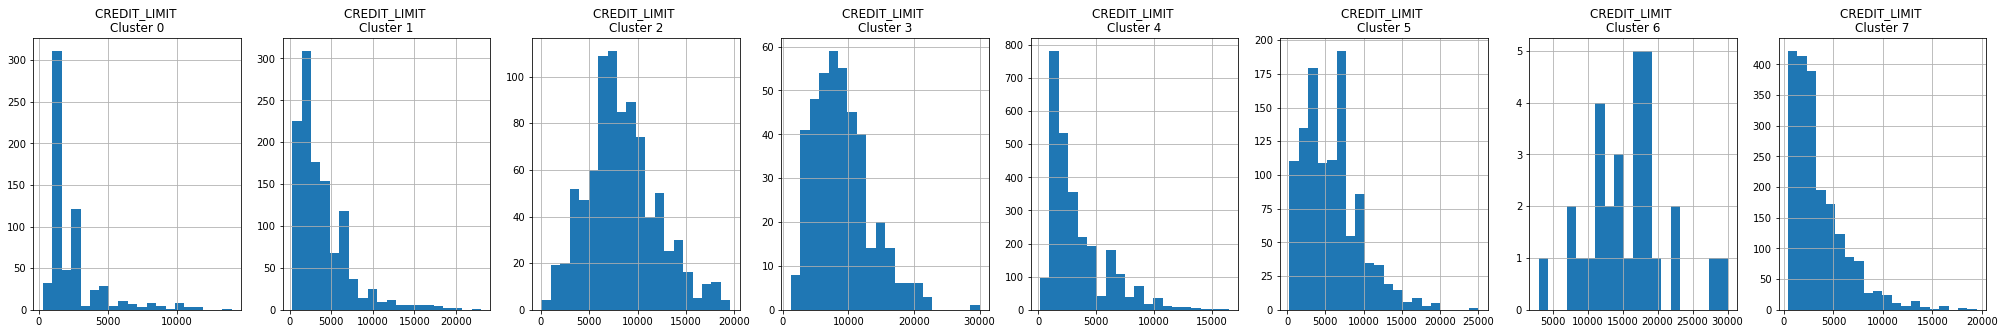

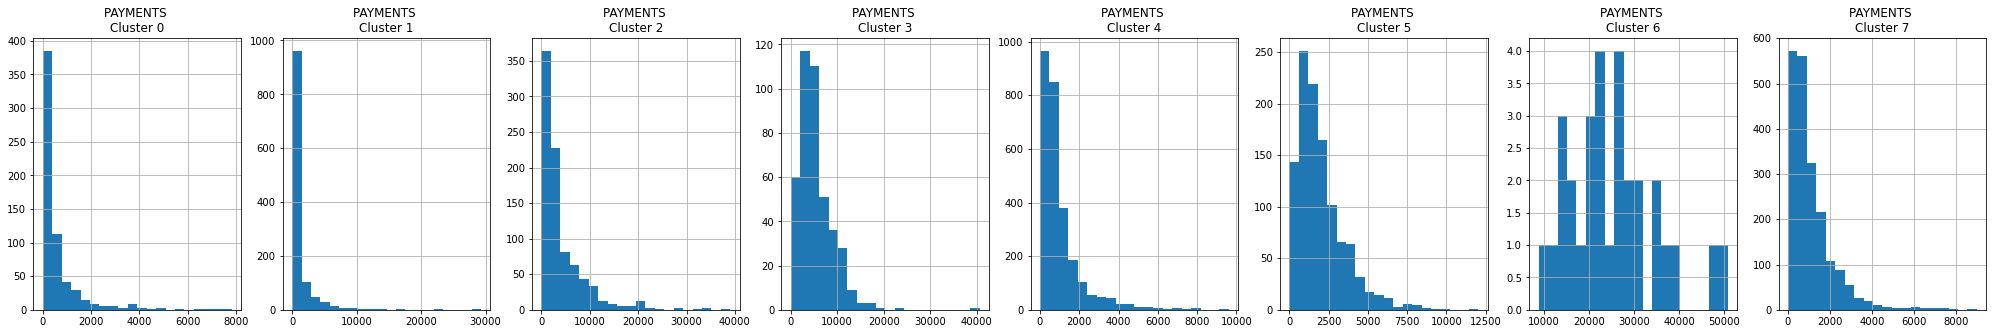

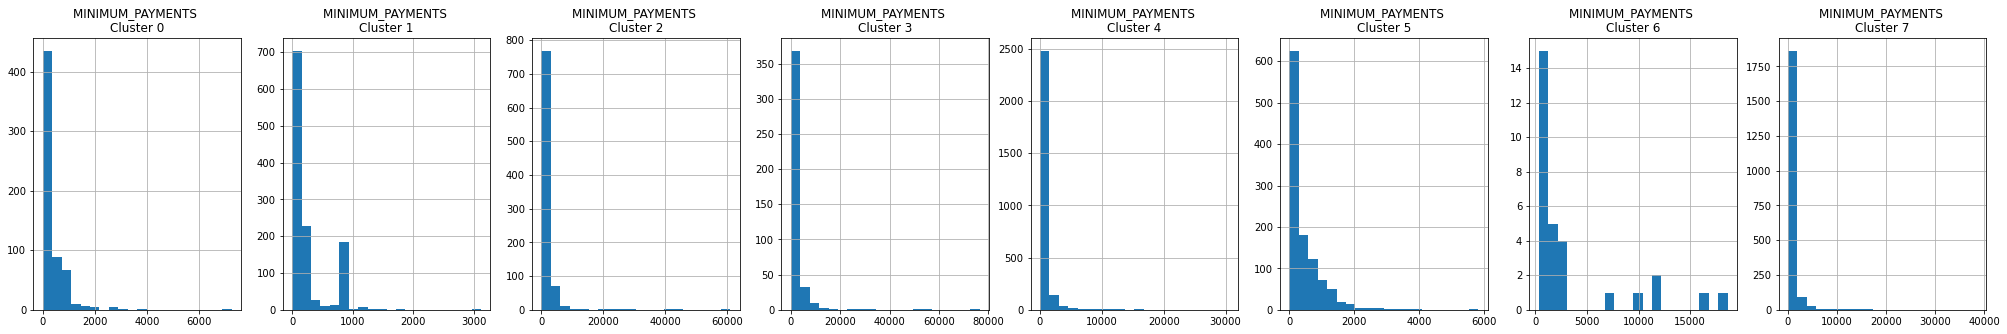

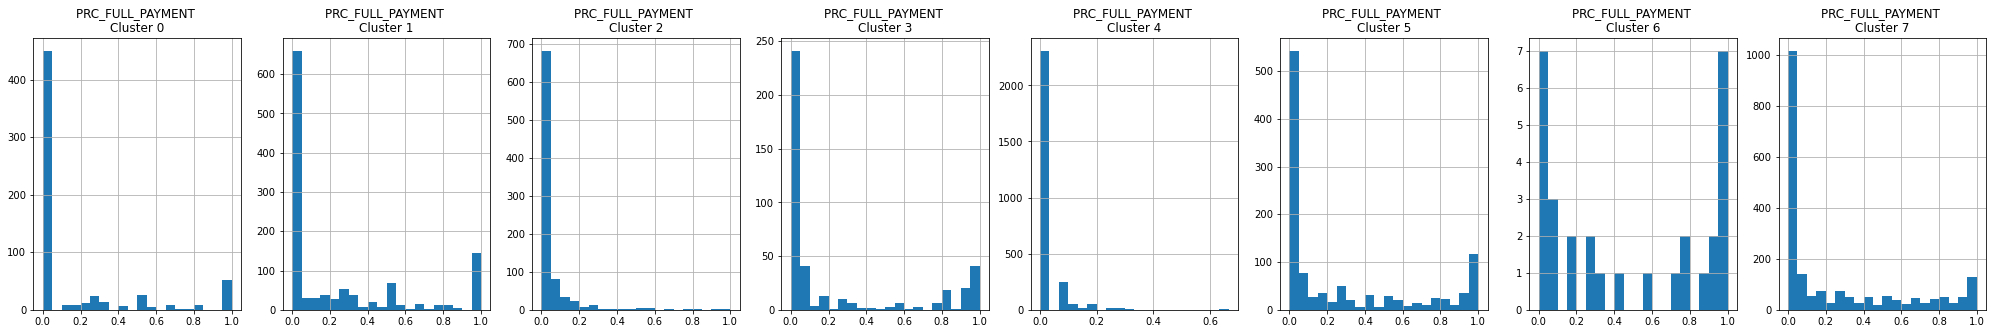

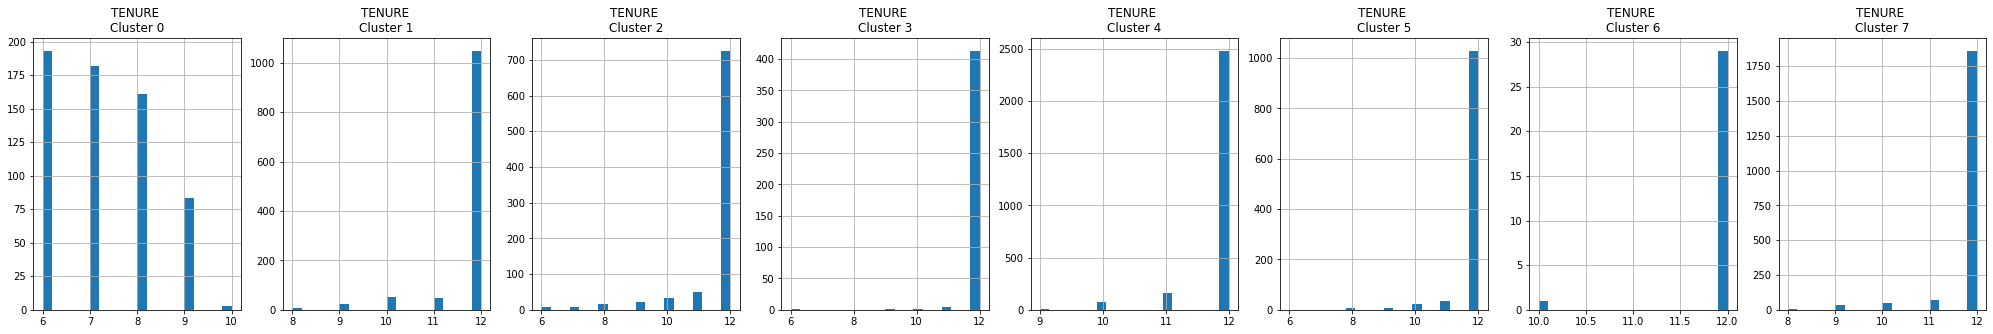

In [32]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['CLUSTER'] == j]
        cluster[i].hist(bins = 20)
        plt.title(f'{i} \nCluster {j}')
    plt.show()
pass

### Acima podemos ver as diferenças entre as distribuições de cada grupo para cada atributo do conjunto de dados.

In [33]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'CLUSTER')
credit_ordered.reset_index(inplace = True)

In [34]:
credit_ordered.head()

,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,0
1,7404,48.573636,1.000000,258.36,0.00,258.36,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,197.464636,81.829414,0.5,6,0
2,7381,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,1500.0,118.438703,54.138711,0.0,6,0
3,7344,2421.820915,0.666667,0.00,0.00,0.00,4045.770203,0.000000,0.000000,0.000000,0.500000,7,0,5000.0,334.730343,442.116227,0.0,6,0
4,7338,677.403883,1.000000,0.00,0.00,0.00,1149.411566,0.000000,0.000000,0.000000,0.666667,8,0,1200.0,126.873568,125.922743,0.0,6,0


In [35]:
credit_ordered.to_csv('clusters.csv')

# Aplicação de PCA (principal component analysis) e visualização dos resultados

### A ideia aqui é visualizarmos melhor a distribuição dos grupos. Com várias dimensões é impossível gerarmos uma figura, então a estratégia é reduzirmos através do PCA para que possa ser gerado um gráfico.

In [36]:
pca = PCA(n_components = 2)
principal_com = pca.fit_transform(creditcard_df_scaled)

In [37]:
pca_df = pd.DataFrame(data = principal_com, columns = ['PCA 1', 'PCA 2'])
pca_df.head()

,PCA 1,PCA 2
0,-1.682221,-1.076448
1,-1.138295,2.506490
2,0.969686,-0.383528
3,-0.873628,0.043172
4,-1.599434,-0.688581


In [38]:
pca_df = pd.concat([pca_df, pd.DataFrame({'CLUSTER': labels})], axis = 1)
pca_df.head()

,PCA 1,PCA 2,CLUSTER
0,-1.682221,-1.076448,4
1,-1.138295,2.506490,2
2,0.969686,-0.383528,5
3,-0.873628,0.043172,4
4,-1.599434,-0.688581,4


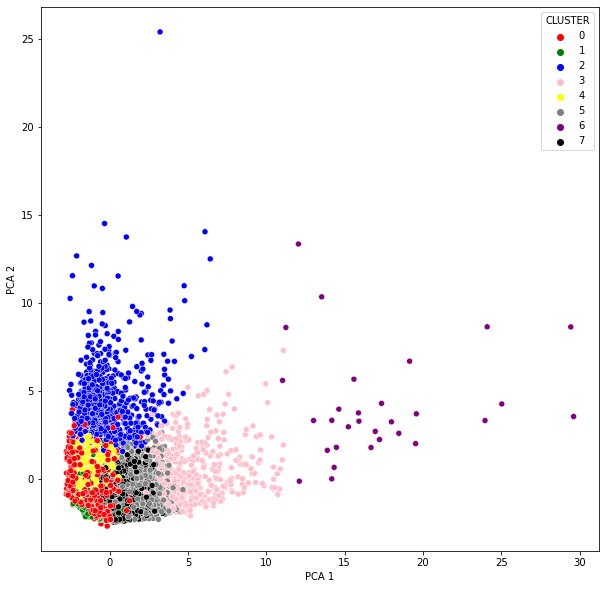

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'PCA 1', y = 'PCA 2', hue = 'CLUSTER', 
                data = pca_df, palette = ['red','green','blue','pink','yellow','gray','purple','black'])
pass

# Aplicação de Autoencoders

### Autoencoders é um tipo de rede neural artificial utilizada para codificar dados, utilizando a mesma entrada e saida para serem comparadas. A ideia é reduzir o número de atributos (através da correlação entre eles), codificando-os de tal forma que, ao decodificá-los, obtemos os dados o mais próximo possível dos originais.

In [40]:
creditcard_df_scaled.shape

(8950, 17)

In [41]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [42]:
input_df = Input(shape=(17,))
x = Dense(500, activation = 'relu')(input_df)
x = Dense(2000, activation = 'relu')(x)

encoded = Dense(10, activation = 'relu')(x)

x = Dense(2000, activation = 'relu')(encoded)
x = Dense(500, activation = 'relu')(x)

decoded = Dense(17)(x)

In [43]:
autoencoder = Model(input_df, decoded)

In [44]:
encoder = Model(input_df, encoded)

In [45]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [46]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50, verbose = 0)

In [47]:
creditcard_df_scaled.shape

(8950, 17)

In [48]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 5ms/step


In [49]:
compact.shape

(8950, 10)

In [50]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

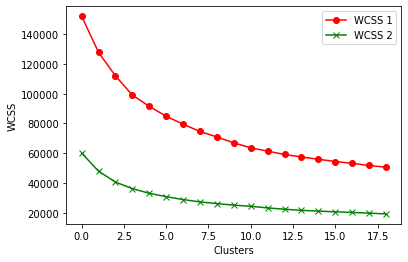

In [51]:
plt.plot(wcss_1, marker = 'o', color = 'r', label = 'WCSS 1')
plt.plot(wcss_2, marker = 'x', color = 'g', label = 'WCSS 2')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.legend()
pass

In [52]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [53]:
labels = kmeans.labels_
labels.shape

(8950,)

In [54]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'CLUSTER': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [55]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.105616,-0.259692
1,0.388163,1.308529
2,-1.066379,-0.362567
3,0.085224,0.313657
4,-1.377653,-0.200652


In [56]:
pca_df = pd.concat([pca_df,pd.DataFrame({'CLUSTER': labels})], axis = 1)
pca_df.head()

,PCA1,PCA2,CLUSTER
0,-1.105616,-0.259692,3
1,0.388163,1.308529,2
2,-1.066379,-0.362567,3
3,0.085224,0.313657,3
4,-1.377653,-0.200652,3


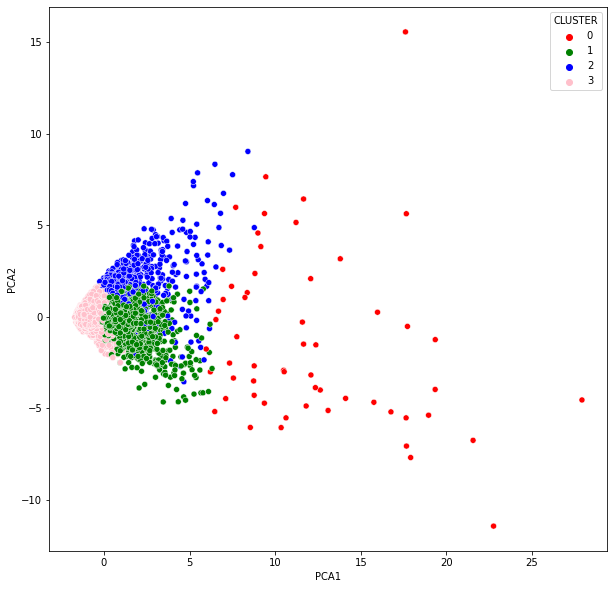

In [57]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'CLUSTER', 
                data = pca_df, palette = ['red','green','blue','pink'])
pass

### Podemos observar que ao utilizar o Autoencoder conseguimos uma distribuição muito melhor de grupos para o conjunto de dados.

In [58]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'CLUSTER')

In [59]:
df_cluster_ordered.to_csv('cluster_ordereded.xls')